In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot
import pandas

In [2]:
dataset = datasets.load_diabetes(as_frame=True)
X = dataset.data[["bp"]]
Y = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [3]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
Y_predSKL = regression.predict(X_test)


In [4]:
from LinearFunction import LinearFunction
linearApproximation = LinearFunction.FindApproximatedLinearFunction(X_train.values, Y_train.values)
Y_predManual = [linearApproximation(x)[0] for x in X_test.values]

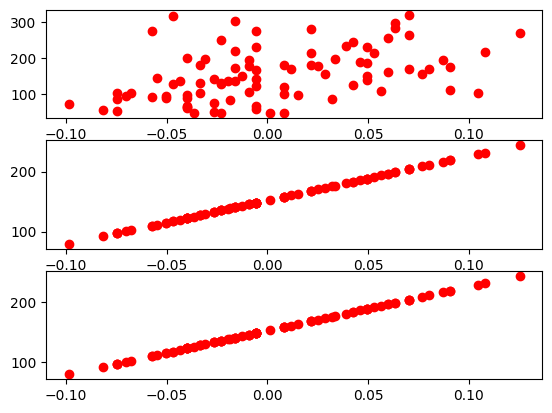

In [5]:
fig, (axis1, axis2, axis3) =  pyplot.subplots(3)
axis1.plot(X_test, Y_test, "o", color="r")
axis2.plot(X_test, Y_predSKL, "o", color="r")
axis3.plot(X_test, Y_predManual, "o", color="r")

In [6]:
print(f"SKLearn:\n\t y = {regression.coef_[0]}x + {regression.intercept_}")
print(f"Manual:\n\t y = {linearApproximation.k[0]}x + {linearApproximation.b[0]}")

predictedData = pandas.DataFrame({'Actual': Y_test, 'Predicted (SKL)': Y_predSKL, 'Predicted (Manual)' : Y_predManual}) 
predictedData

SKLearn:
	 y = 737.0020277683608x + 152.09319368130312
Manual:
	 y = 737.0020277683604x + 152.09319368130312


,Actual,Predicted (SKL),Predicted (Manual)
362,321.0,203.736620,203.736620
249,215.0,191.049680,191.049680
271,127.0,183.437515,183.437515
435,64.0,122.540199,122.540199
400,175.0,218.960949,218.960949
...,...,...,...
381,104.0,97.166318,97.166318
213,49.0,135.227140,135.227140
134,103.0,127.614976,127.614976
49,142.0,147.914081,147.914081


In [7]:
# Вывод метрик
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
print("MAE:", mean_absolute_error(Y_test, Y_predManual))
print("R2:", r2_score(Y_test, Y_predManual))
print("MAPE:", mean_absolute_percentage_error(Y_test, Y_predManual))

MAE: 49.826004651068665
R2: 0.18725935383524017
MAPE: 0.4202516449956507
